In [1]:
import torch
print(torch.__version__)

1.0.0


In [2]:
import torchvision
print(torchvision.__version__)

0.2.1


In [3]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    devID, torch.cuda.get_device_name(devID)
else:
    print("Torch Cuda not avaialbe")

Torch Cuda not avaialbe


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
device

device(type='cpu')

In [5]:
import sklearn
print(sklearn.__version__)

0.20.1


In [6]:
import pandas as pd 
import numpy as np 
import json

In [7]:
PATH ='data/'
!ls data

data_description.txt  sample_submission.csv  test.csv  train.csv


In [8]:
train = pd.read_csv(PATH+'train.csv')
test = pd.read_csv(PATH+'test.csv')

In [9]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [14]:
# set target columns and remove from training dataset
house_target = train.SalePrice
house_target_desc = 'SalePrice'
house_predictors = train.drop([house_target_desc], axis=1)

#check if target has any missing values
house_target.isnull().values.any()

False

In [15]:
house_predictors.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


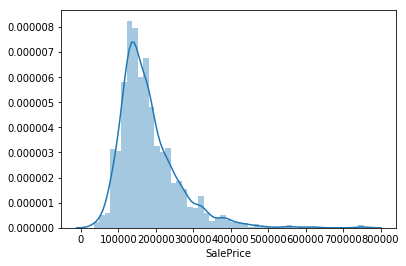

In [16]:
import seaborn as sns
%matplotlib inline
sns.distplot(house_target)

In [17]:
house_target = pd.DataFrame(house_target)
house_target

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [18]:
#Scale target variable
#house_target['SalePrice'] = (house_target['SalePrice'] - house_target['SalePrice'].mean)/house_target['SalePrice'].std

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x=house_target.values
x_scaled=sc_X.fit_transform(x)
house_target2=pd.DataFrame(x_scaled, columns=house_target.columns)

house_target2.head()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843


In [19]:
house_target.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [20]:
# Scale target data data.
mean = house_target.mean(axis=0)
std = house_target.std(axis=0)
house_target = ( house_target - mean ) / std
house_target.head()

,SalePrice
0,0.347154
1,0.007286
2,0.535970
3,-0.515105
4,0.869545


In [21]:
# check for any NaN values in dataset
house_predictors.isnull().values.any()

True

In [22]:
#assemble list of columns with missing values count > 0 (NaN)
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
print(missing_val_count_by_column, "out of total dataset length:", len(house_predictors))

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 out of total dataset length: 1460


In [23]:
house_predictors['Alley'].notnull().head(25)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
Name: Alley, dtype: bool

In [24]:
#from sklearn.impute import SimpleImputer
#my_imputer = SimpleImputer()
#train_with_imputed_values = my_imputer.fit_transform(train)

## Deep Learning

In [25]:
house_target_desc = 'SalePrice'
house_target_column = train.SalePrice
house_predictors = train.copy()
#house_predictors = house_predictors.drop(['SalePrice'], axis=1)

In [26]:
house_predictors.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [27]:
house_predictors.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
house_predictors.shape, len(house_predictors)

((1460, 81), 1460)

In [29]:
# find columns with missing values and count how many
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
missing_val_count_by_column = pd.DataFrame(missing_val_count_by_column)
#missing_val_count_by_column = missing_val_count_by_column.rename(columns={'0': 'Missing'}, inplace=True)
missing_val_count_by_column['%'] = missing_val_count_by_column[0]/len(house_predictors)*100
missing_val_count_by_column.columns=['Missing Values', '%']
missing_val_count_by_column

,Missing Values,%
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [30]:
type(missing_val_count_by_column)

pandas.core.frame.DataFrame

In [31]:
# extract column indexes into a list
missing_columns = list(missing_val_count_by_column.index)
missing_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [32]:
missing_df = house_predictors[missing_columns].copy()
missing_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,70,85,NaN,91,NaN,51,NaN,72,66,70
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrType,BrkFace,None,BrkFace,None,BrkFace,None,Stone,Stone,None,None,None,Stone,None,Stone,BrkFace,None,BrkFace,None,None,None
MasVnrArea,196,0,162,0,350,0,186,240,0,0,0,286,0,306,212,0,180,0,0,0
BsmtQual,Gd,Gd,Gd,TA,Gd,Gd,Ex,Gd,TA,TA,TA,Ex,TA,Gd,TA,TA,TA,NaN,TA,TA
BsmtCond,TA,TA,TA,Gd,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,NaN,TA,TA
BsmtExposure,No,Gd,Mn,No,Av,No,Av,Mn,No,No,No,No,No,Av,No,No,No,NaN,No,No
BsmtFinType1,GLQ,ALQ,GLQ,ALQ,GLQ,GLQ,GLQ,ALQ,Unf,GLQ,Rec,GLQ,ALQ,Unf,BLQ,Unf,ALQ,NaN,GLQ,LwQ
BsmtFinType2,Unf,Unf,Unf,Unf,Unf,Unf,Unf,BLQ,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,NaN,Unf,Unf
Electrical,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseF,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseA,SBrkr,SBrkr,SBrkr,SBrkr


In [33]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


In [34]:
# show missing columns with continuous data
missing_contin_df = missing_df.select_dtypes(exclude=['object'])
missing_contin_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,70.0,85.0,NaN,91.0,NaN,51.0,NaN,72.0,66.0,70.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,0.0,286.0,0.0,306.0,212.0,0.0,180.0,0.0,0.0,0.0
GarageYrBlt,2003.0,1976.0,2001.0,1998.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,1965.0,2005.0,1962.0,2006.0,1960.0,1991.0,1970.0,1967.0,2004.0,1958.0


In [35]:
# fill in unknown NaN values for selected cont columns
for column in missing_contin_df:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float64')
     house_predictors[column] = house_predictors[column].fillna(house_predictors[column].mean()).astype('float64')

#test to make sure
house_predictors[column].isnull().values.any()

False

In [36]:
house_predictors['LotFrontage'].mean()

70.04995836802642

In [37]:
house_predictors['LotFrontage'].head(10)

0    65.000000
1    80.000000
2    68.000000
3    60.000000
4    84.000000
5    85.000000
6    75.000000
7    70.049958
8    51.000000
9    50.000000
Name: LotFrontage, dtype: float64

In [38]:
# show missing columns with catogorical data
missing_cat_df = missing_df.select_dtypes(exclude=['float64'])
missing_cat_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrType,BrkFace,None,BrkFace,None,BrkFace,None,Stone,Stone,None,None,None,Stone,None,Stone,BrkFace,None,BrkFace,None,None,None
BsmtQual,Gd,Gd,Gd,TA,Gd,Gd,Ex,Gd,TA,TA,TA,Ex,TA,Gd,TA,TA,TA,NaN,TA,TA
BsmtCond,TA,TA,TA,Gd,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,NaN,TA,TA
BsmtExposure,No,Gd,Mn,No,Av,No,Av,Mn,No,No,No,No,No,Av,No,No,No,NaN,No,No
BsmtFinType1,GLQ,ALQ,GLQ,ALQ,GLQ,GLQ,GLQ,ALQ,Unf,GLQ,Rec,GLQ,ALQ,Unf,BLQ,Unf,ALQ,NaN,GLQ,LwQ
BsmtFinType2,Unf,Unf,Unf,Unf,Unf,Unf,Unf,BLQ,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,NaN,Unf,Unf
Electrical,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseF,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseA,SBrkr,SBrkr,SBrkr,SBrkr
FireplaceQu,NaN,TA,TA,Gd,TA,NaN,Gd,TA,TA,TA,NaN,Gd,NaN,Gd,Fa,NaN,TA,NaN,NaN,NaN
GarageType,Attchd,Attchd,Attchd,Detchd,Attchd,Attchd,Attchd,Attchd,Detchd,Attchd,Detchd,BuiltIn,Detchd,Attchd,Attchd,Detchd,Attchd,CarPort,Detchd,Attchd


In [39]:
# fill missing values for categorical variables
Fillvalues = {'Alley': 'missing',
              'MasVnrType': 'missing',
              'BsmtQual': 'missing', 
              'BsmtCond': 'missing', 
              'BsmtExposure': 'missing',
              'BsmtFinType1': 'missing', 
              'BsmtFinType2': 'missing', 
              'Electrical': 'missing',
              'FireplaceQu': 'missing',
              'GarageType': 'missing',
              'GarageFinish': 'missing',
              'GarageQual': 'missing',
              'GarageCond': 'missing',
              'PoolQC': 'missing',
              'Fence': 'missing',
              'MiscFeature': 'missing'}
house_predictors.fillna(value=Fillvalues, inplace=True)

In [40]:
#check whole dataset for missing
house_predictors.isnull().values.any()

False

In [41]:
house_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [42]:
x,y = house_predictors.shape
house_predictors.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
MSSubClass,60,20,60,70,60,50,20,60,50,190,20,60,20,20,20,45,20,90,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,70.05,51,50,70,85,70.05,91,70.05,51,70.05,72,66,70
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,11200,11924,12968,10652,10920,6120,11241,10791,13695,7560
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,Reg,IR1,IR2,IR1,IR1,Reg,IR1,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [43]:
#select which vars are continueouis and categorical
# cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape','LandContour','Utilities','LotConfig',
#            'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
#             'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
#             'ExterCond','Foundation','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating',
#             'HeatingQC','CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#             'BedroomAbvGr','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 'FireplaceQu',
#             'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual','GarageCond','PavedDrive',
#             'PoolQC', 'Fence','MiscFeature','MoSold', 'YrSold','SaleType','SaleCondition']

#Removing as they break fit loop: 'OverallQual','BsmtCond', 'Electrical','SaleType'
cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape','LandContour','Utilities','LotConfig',
           'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallCond',
            'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
             'ExterCond','Foundation','BsmtQual','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating',
             'HeatingQC','CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 'FireplaceQu',
             'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual','GarageCond','PavedDrive',
             'PoolQC', 'Fence','MiscFeature','MoSold', 'YrSold','SaleCondition']

contin_vars = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

house_target_desc = 'SalePrice'

In [44]:
#columns which break fit
house_predictors[['OverallQual','BsmtCond', 'Electrical','SaleType']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
OverallQual    1460 non-null int64
BsmtCond       1460 non-null object
Electrical     1460 non-null object
SaleType       1460 non-null object
dtypes: int64(1), object(3)
memory usage: 45.7+ KB


In [45]:
#columns which break fit
house_predictors[['OverallQual','BsmtCond', 'Electrical','SaleType']].head()

,OverallQual,BsmtCond,Electrical,SaleType
0,7,TA,SBrkr,WD
1,6,TA,SBrkr,WD
2,7,TA,SBrkr,WD
3,7,Gd,SBrkr,WD
4,8,TA,SBrkr,WD


In [46]:
house_predictors['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [47]:
house_predictors['BsmtCond'].value_counts()

TA         1311
Gd           65
Fa           45
missing      37
Po            2
Name: BsmtCond, dtype: int64

In [48]:
house_predictors['Electrical'].value_counts()

SBrkr      1334
FuseA        94
FuseF        27
FuseP         3
Mix           1
missing       1
Name: Electrical, dtype: int64

In [49]:
house_predictors['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [50]:
house_predictors[cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 no

In [51]:
house_predictors['SaleCondition'].dtype

dtype('O')

In [52]:
for v in cat_vars:
    if house_predictors[v].dtype != object:
        house_predictors[v] = house_predictors[v].astype(str)

In [53]:
house_predictors[cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
Id               1460 non-null object
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        14

In [54]:
house_predictors_sml = house_predictors[cat_vars+contin_vars+[house_target_desc]].copy()

In [55]:
house_predictors_sml.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,missing,missing,missing,missing,missing
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl


In [56]:
# copy back reduced dataset
house_predictors = house_predictors_sml.copy()

In [57]:
house_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null object
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        14

In [58]:
from sklearn.model_selection import train_test_split

# split train dataset into train and test
X_train_predictors, X_valid, y_train_predictors, y_valid = train_test_split(house_predictors, house_target_column,
                                                                 train_size=0.7, test_size=0.3, random_state=42)
#X_train_predictors, X_validate = train_test_split(house_predictors, train_size=0.8, random_state=42, shuffle=True)

In [59]:

X_train_predictors.shape, X_valid.shape

((1021, 77), (438, 77))

In [60]:
y_train_predictors.head()

135     174000
1452    145000
762     215200
932     320000
435     212000
Name: SalePrice, dtype: int64

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X_train_predictors,y_train_predictors, train_size=0.75, random_state=42, shuffle=True)

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [62]:
X_train.shape, X_test.shape

((765, 77), (256, 77))

In [63]:
for v in cat_vars:
    X_train[v] = X_train[v].astype('category').cat.as_ordered()
    X_test[v] = X_test[v].astype('category').cat.as_ordered()
    X_valid[v] = X_valid[v].astype('category').cat.as_ordered()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [64]:
for v in contin_vars:
    #house_predictors[v] = house_predictors[v].fillna(0).astype('float32')  # with replacing NaN
    #house_predictors[v] = house_predictors[v].astype('float32')
    X_train[v] = X_train[v].astype('float32').values.reshape(-1, 1)  #convert to float and reshape
    X_test[v] = X_test[v].astype('float32').values.reshape(-1, 1)  #convert to float and reshape
    X_valid[v] = X_valid[v].astype('float32').values.reshape(-1, 1)  #convert to float and reshape

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 121 to 778
Data columns (total 77 columns):
Id               765 non-null category
MSSubClass       765 non-null category
MSZoning         765 non-null category
Street           765 non-null category
Alley            765 non-null category
LotShape         765 non-null category
LandContour      765 non-null category
Utilities        765 non-null category
LotConfig        765 non-null category
LandSlope        765 non-null category
Neighborhood     765 non-null category
Condition1       765 non-null category
Condition2       765 non-null category
BldgType         765 non-null category
HouseStyle       765 non-null category
OverallCond      765 non-null category
YearBuilt        765 non-null category
YearRemodAdd     765 non-null category
RoofStyle        765 non-null category
RoofMatl         765 non-null category
Exterior1st      765 non-null category
Exterior2nd      765 non-null category
MasVnrType       765 non-null categ

In [66]:
X_train.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
121,122,50,RM,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,...,1123.0,264.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,100000
68,69,30,RM,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,...,747.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80000
156,157,20,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,...,1040.0,625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109500
572,573,60,RL,Pave,missing,IR1,HLS,AllPub,Corner,Gtl,...,1692.0,650.0,208.0,114.0,0.0,0.0,0.0,0.0,0.0,224500
870,871,20,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,...,894.0,308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109500


In [67]:
# Scale train data data.
mean = X_train[contin_vars].mean(axis=0)
std = X_train[contin_vars].std(axis=0)
X_train[contin_vars] = ( X_train[contin_vars] - mean ) / std
X_train[contin_vars].head()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
121,-0.828357,-0.468701,-0.600576,-0.929814,-0.273144,0.349708,-0.704717,-1.012337,-0.023585,-0.13931,-0.767229,-1.006551,-0.731747,-0.711835,1.910578,-0.12049,-0.271066,-0.079987,-0.15053
68,-0.950972,-0.626061,-0.600576,-0.929814,-0.273144,0.383498,-0.672159,-1.075824,-0.812447,-0.13931,-1.459298,-1.212689,-0.731747,-0.711835,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053
156,-0.419639,-0.345153,-0.600576,-0.929814,-0.273144,-1.299204,-2.293528,-0.331751,-0.812447,-0.13931,-0.920000,0.684711,-0.731747,-0.711835,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053
572,0.520411,0.300654,-0.600576,-0.929814,-0.273144,0.606506,-0.457279,-0.824414,1.088913,-0.13931,0.280078,0.801835,0.841728,0.910810,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053
870,-0.419639,-0.410178,-0.600576,-0.929814,-0.273144,0.714632,-0.353095,-0.702518,-0.812447,-0.13931,-1.188729,-0.800414,-0.731747,-0.711835,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053


In [68]:
X_train[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
121,-0.828357,-0.468701,-0.600576,-0.929814,-0.273144,0.349708,-0.704717,-1.012337,-0.023585,-0.13931,-0.767229,-1.006551,-0.731747,-0.711835,1.910578,-0.12049,-0.271066,-0.079987,-0.15053
68,-0.950972,-0.626061,-0.600576,-0.929814,-0.273144,0.383498,-0.672159,-1.075824,-0.812447,-0.13931,-1.459298,-1.212689,-0.731747,-0.711835,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053
156,-0.419639,-0.345153,-0.600576,-0.929814,-0.273144,-1.299204,-2.293528,-0.331751,-0.812447,-0.13931,-0.920000,0.684711,-0.731747,-0.711835,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053
572,0.520411,0.300654,-0.600576,-0.929814,-0.273144,0.606506,-0.457279,-0.824414,1.088913,-0.13931,0.280078,0.801835,0.841728,0.910810,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053
870,-0.419639,-0.410178,-0.600576,-0.929814,-0.273144,0.714632,-0.353095,-0.702518,-0.812447,-0.13931,-1.188729,-0.800414,-0.731747,-0.711835,-0.350299,-0.12049,-0.271066,-0.079987,-0.15053


In [69]:
# Scale test data data.
mean = X_test[contin_vars].mean(axis=0)
std = X_test[contin_vars].std(axis=0)
X_test[contin_vars] = ( X_test[contin_vars] - mean ) / std
X_test[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
444,-0.028848,-0.193396,-0.643589,0.437746,-0.303761,-0.618245,-0.376002,-0.616217,1.495763,NaN,0.832555,0.112679,0.338191,1.281090,-0.333923,-0.127093,-0.290545,NaN,-0.115566
335,-0.026097,9.530984,-0.643589,1.909481,0.511701,-0.995545,1.061287,1.201588,-0.383667,NaN,0.585125,0.299115,4.364317,-0.727963,-0.333923,-0.127093,-0.290545,NaN,1.158864
176,1.457551,-0.113622,1.056283,0.895996,-0.303761,-0.513932,0.204820,-0.004099,1.312007,NaN,1.140827,0.257684,-0.764018,2.716128,-0.333923,-0.127093,3.205378,NaN,-0.115566
963,2.833846,0.004510,-0.643589,-1.118851,-0.303761,2.770797,1.802081,1.681213,-0.772114,NaN,0.613519,1.195043,1.440401,1.326407,-0.333923,-0.127093,-0.290545,NaN,-0.115566
431,-0.579366,-0.390740,-0.643589,-1.118851,-0.303761,0.775546,-0.410458,-0.205488,-0.516251,NaN,-0.607403,-2.440457,-0.764018,0.752392,-0.333923,-0.127093,-0.290545,NaN,-0.115566


In [70]:
#Convert cat variables to one-hot-encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for cat_col in cat_vars:
        label_encoders[cat_col] = LabelEncoder()
        X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col])
        X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col])

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
from torch.utils.data import Dataset, DataLoader


class TabularDataset(Dataset):
  def __init__(self, data, cat_cols=None, output_col=None):
    """
    Characterizes a Dataset for PyTorch

    Parameters
    ----------

    data: pandas data frame
      The data frame object for the input data. It must
      contain all the continuous, categorical and the
      output columns to be used.

    cat_cols: List of strings
      The names of the categorical columns in the data.
      These columns will be passed through the embedding
      layers in the model. These columns must be
      label encoded beforehand. 

    output_col: string
      The name of the output variable column in the data
      provided.
    """

    self.n = data.shape[0]

    if output_col:
      self.y = data[output_col].astype(np.float32).values.reshape(-1, 1)
    else:
      self.y =  np.zeros((self.n, 1))

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                      if col not in self.cat_cols + [output_col]]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]

In [72]:
# instantiating TabularDataset class

# Pytorch abstract class representing a Dataset.
#All other datasets should subclass it. All subclasses should override
#``__len__``, that provides the size of the dataset, and ``__getitem__``,

train_dataset = TabularDataset(data=X_train, cat_cols=cat_vars, output_col=house_target_desc)
test_dataset = TabularDataset(data=X_test, cat_cols=cat_vars, output_col=house_target_desc)

In [73]:
len(train_dataset), len(test_dataset)

(765, 256)

In [74]:
batchsize = 64
dataloader = DataLoader(train_dataset, batchsize, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batchsize, shuffle=True, num_workers=1)

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class FeedForwardNN(nn.Module):

  def __init__(self, emb_dims, no_of_cont, lin_layer_sizes,
               output_size, emb_dropout, lin_layer_dropouts):

    """
    Parameters
    ----------

    emb_dims: List of two element tuples
      This list will contain a two element tuple for each
      categorical feature. The first element of a tuple will
      denote the number of unique values of the categorical
      feature. The second element will denote the embedding
      dimension to be used for that feature.

    no_of_cont: Integer
      The number of continuous features in the data.

    lin_layer_sizes: List of integers.
      The size of each linear layer. The length will be equal
      to the total number
      of linear layers in the network.

    output_size: Integer
      The size of the final output.

    emb_dropout: Float
      The dropout to be used after the embedding layers.

    lin_layer_dropouts: List of floats
      The dropouts to be used after each linear layer.
    """

    super().__init__()

    # Embedding layers
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y)
                                     for x, y in emb_dims])

    no_of_embs = sum([y for x, y in emb_dims])
    self.no_of_embs = no_of_embs
    self.no_of_cont = no_of_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.no_of_embs + self.no_of_cont,
                                lin_layer_sizes[0])

    self.lin_layers =\
     nn.ModuleList([first_lin_layer] +\
          [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
           for i in range(len(lin_layer_sizes) - 1)])
    
    for lin_layer in self.lin_layers:
      nn.init.kaiming_normal_(lin_layer.weight.data)

    # Output Layer
    self.output_layer = nn.Linear(lin_layer_sizes[-1],
                                  output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size)
                                    for size in lin_layer_sizes])

    # Dropout Layers
    self.emb_dropout_layer = nn.Dropout(emb_dropout)
    self.droput_layers = nn.ModuleList([nn.Dropout(size)
                                  for size in lin_layer_dropouts])

  def forward(self, cont_data, cat_data):

    if self.no_of_embs != 0:
      x = [emb_layer(cat_data[:, i])
           for i,emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      x = self.emb_dropout_layer(x)

    if self.no_of_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.no_of_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = normalized_cont_data

    for lin_layer, dropout_layer, bn_layer in\
        zip(self.lin_layers, self.droput_layers, self.bn_layers):
      
      x = F.relu(lin_layer(x))
      x = bn_layer(x)
      x = dropout_layer(x)

    x = self.output_layer(x)

    return x

In [76]:
cat_dimsFull = [[int(X_train[col].nunique()),col] for col in cat_vars]
cat_dimsFull

[[765, 'Id'],
 [15, 'MSSubClass'],
 [5, 'MSZoning'],
 [2, 'Street'],
 [3, 'Alley'],
 [4, 'LotShape'],
 [4, 'LandContour'],
 [2, 'Utilities'],
 [5, 'LotConfig'],
 [3, 'LandSlope'],
 [25, 'Neighborhood'],
 [9, 'Condition1'],
 [5, 'Condition2'],
 [5, 'BldgType'],
 [8, 'HouseStyle'],
 [8, 'OverallCond'],
 [105, 'YearBuilt'],
 [61, 'YearRemodAdd'],
 [6, 'RoofStyle'],
 [7, 'RoofMatl'],
 [14, 'Exterior1st'],
 [15, 'Exterior2nd'],
 [5, 'MasVnrType'],
 [4, 'ExterQual'],
 [5, 'ExterCond'],
 [6, 'Foundation'],
 [5, 'BsmtQual'],
 [5, 'BsmtExposure'],
 [7, 'BsmtFinType1'],
 [7, 'BsmtFinType2'],
 [5, 'Heating'],
 [5, 'HeatingQC'],
 [2, 'CentralAir'],
 [4, 'BsmtFullBath'],
 [3, 'BsmtHalfBath'],
 [4, 'FullBath'],
 [3, 'HalfBath'],
 [8, 'BedroomAbvGr'],
 [3, 'KitchenAbvGr'],
 [4, 'KitchenQual'],
 [12, 'TotRmsAbvGrd'],
 [7, 'Functional'],
 [4, 'Fireplaces'],
 [6, 'FireplaceQu'],
 [7, 'GarageType'],
 [91, 'GarageYrBlt'],
 [4, 'GarageFinish'],
 [5, 'GarageCars'],
 [5, 'GarageQual'],
 [5, 'GarageCond'],
 [

In [77]:
cat_dims=[int(X_train[col].nunique()) for col in cat_vars]
cat_dims

[765,
 15,
 5,
 2,
 3,
 4,
 4,
 2,
 5,
 3,
 25,
 9,
 5,
 5,
 8,
 8,
 105,
 61,
 6,
 7,
 14,
 15,
 5,
 4,
 5,
 6,
 5,
 5,
 7,
 7,
 5,
 5,
 2,
 4,
 3,
 4,
 3,
 8,
 3,
 4,
 12,
 7,
 4,
 6,
 7,
 91,
 4,
 5,
 5,
 5,
 3,
 4,
 5,
 4,
 12,
 5,
 6]

In [78]:
cat_dimsT = [int(X_test[col].nunique()) for col in cat_vars]
#cat_dimsT

In [79]:
#cat_sz = [(c, len(X_train[c].cat.categories)+1) for c in cat_vars]

In [80]:
emb_dims = [(x, min(50, (x + 4) // 2)) for x in cat_dims]
emb_dims

[(765, 50),
 (15, 9),
 (5, 4),
 (2, 3),
 (3, 3),
 (4, 4),
 (4, 4),
 (2, 3),
 (5, 4),
 (3, 3),
 (25, 14),
 (9, 6),
 (5, 4),
 (5, 4),
 (8, 6),
 (8, 6),
 (105, 50),
 (61, 32),
 (6, 5),
 (7, 5),
 (14, 9),
 (15, 9),
 (5, 4),
 (4, 4),
 (5, 4),
 (6, 5),
 (5, 4),
 (5, 4),
 (7, 5),
 (7, 5),
 (5, 4),
 (5, 4),
 (2, 3),
 (4, 4),
 (3, 3),
 (4, 4),
 (3, 3),
 (8, 6),
 (3, 3),
 (4, 4),
 (12, 8),
 (7, 5),
 (4, 4),
 (6, 5),
 (7, 5),
 (91, 47),
 (4, 4),
 (5, 4),
 (5, 4),
 (5, 4),
 (3, 3),
 (4, 4),
 (5, 4),
 (4, 4),
 (12, 8),
 (5, 4),
 (6, 5)]

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
device

device(type='cpu')

In [82]:
model = FeedForwardNN(emb_dims, no_of_cont=len(train_dataset.cont_cols), 
                      lin_layer_sizes=[100, 200],
                      output_size=1, emb_dropout=0.04,
                      lin_layer_dropouts=[0.001,0.01])
model = model.to(device)

In [83]:
model.train()

FeedForwardNN(
  (emb_layers): ModuleList(
    (0): Embedding(765, 50)
    (1): Embedding(15, 9)
    (2): Embedding(5, 4)
    (3): Embedding(2, 3)
    (4): Embedding(3, 3)
    (5): Embedding(4, 4)
    (6): Embedding(4, 4)
    (7): Embedding(2, 3)
    (8): Embedding(5, 4)
    (9): Embedding(3, 3)
    (10): Embedding(25, 14)
    (11): Embedding(9, 6)
    (12): Embedding(5, 4)
    (13): Embedding(5, 4)
    (14): Embedding(8, 6)
    (15): Embedding(8, 6)
    (16): Embedding(105, 50)
    (17): Embedding(61, 32)
    (18): Embedding(6, 5)
    (19): Embedding(7, 5)
    (20): Embedding(14, 9)
    (21): Embedding(15, 9)
    (22): Embedding(5, 4)
    (23): Embedding(4, 4)
    (24): Embedding(5, 4)
    (25): Embedding(6, 5)
    (26): Embedding(5, 4)
    (27): Embedding(5, 4)
    (28): Embedding(7, 5)
    (29): Embedding(7, 5)
    (30): Embedding(5, 4)
    (31): Embedding(5, 4)
    (32): Embedding(2, 3)
    (33): Embedding(4, 4)
    (34): Embedding(3, 3)
    (35): Embedding(4, 4)
    (36): Embeddin

In [84]:
no_of_epochs = 70
criterion = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [85]:
import os
import time
import copy

since = time.time()

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
best_tst_loss = 1e20
train_losses, test_losses = [],[]

for epoch in range(no_of_epochs):
    running_loss = 0.0
    running_train_corrects = 0.0
    
    # TRAINING PHASE
    i=0
    #print('Epoch {}/{}'.format(epoch, no_of_epochs - 1))
    model.train()  # Set model to training mode
    pid = os.getpid()
    for y, cont_x, cat_x in dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)
        
        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()
        
        # statistics
        running_loss += loss.item() * cat_x.size(0)  #multiple by batch size
        running_train_corrects += torch.sum(preds == y.data).float()
        #print(running_loss)
        
        # print statistics
        #if i % 1000:    # print every n mini-batches         
         #   print('{}\tTrain Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.4f}'.format(
        #        pid, epoch, i * len(cat_x), len(dataloader.dataset),
        #        100. * i / len(dataloader), loss.item()))
    
    # TESTING PHASE
    model.eval()   # Set model to evaluate mode
    running_corrects = 0
    test_loss = 0
    test_loss2 = 0
    correct = 0
    i = 0
    for y, cont_x, cat_x in test_dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #with torch.set_grad_enabled(False):
        with torch.no_grad():
            preds = model(cont_x, cat_x)
            loss = criterion(preds, y)
            #print(loss.item())
            #print(preds[0],y[0])
        
        #test_loss2 += F.nll_loss(preds, y, reduction='sum').item() # sum up batch loss
        #test_loss2  = 0
        #prd = preds.max(1)[1] # get the index of the max log-probability
        #correct += prd.eq(y).sum().item()
        
        running_corrects += torch.sum(preds == y.data).float()
        #running_corrects+=accuracy_score(y, preds)*100
        test_loss += loss.item() * cat_x.size(0)   #cat_x.zize(0) - batch size of 64=       
    
    epoch_train_loss = running_loss / len(train_dataset)
    epoch_train_acc = running_train_corrects / len(train_dataset)
    
    epoch_acc = running_corrects.double() / len(test_dataset)
    epoch_test_loss = test_loss / len(test_dataset)
    
    #print("test_loss2", test_loss2/ len(test_dataloader.dataset))
    #print( 'Accuracy: {}/{}'.format(correct, len(test_dataloader.dataset)))
    
    #epoch_loss = running_loss / dataset_sizes[phase]
    #epoch_acc = running_corrects.double() / dataset_sizes[phase]
    
    # deep copy the model
    if epoch_test_loss < best_tst_loss:
        best_tst_loss = epoch_test_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        # this idea didn't work
 #   else: #always start new epoch with lowest loss
 #       model.load_state_dict(best_model_wts)
    
    print('Epoch {}/{}, Train Loss: {:.6f}, Train Acc:{:.6f}, Test Loss: {:.6f} Acc: {:.6f}'.
          format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_acc))
    
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
    
# load best model weights
model.load_state_dict(best_model_wts)
print("Best Test Loss: ", best_tst_loss)

Epoch 0/69, Train Loss: 39383603689.913727, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 1/69, Train Loss: 39305830078.745094, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 2/69, Train Loss: 39118014204.318954, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 3/69, Train Loss: 38789208200.533333, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 4/69, Train Loss: 38294297044.496735, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 5/69, Train Loss: 37630946648.010460, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 6/69, Train Loss: 36784862838.462746, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 7/69, Train Loss: 35763326178.216995, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 8/69, Train Loss: 34570690940.151634, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 9/69, Train Loss: 33248659474.739868, Train Acc:0.000000, Test Loss: nan Acc: 0.000000
Epoch 10/69, Train Loss: 31806426721.045753, Train Acc:0.000000, Test 

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

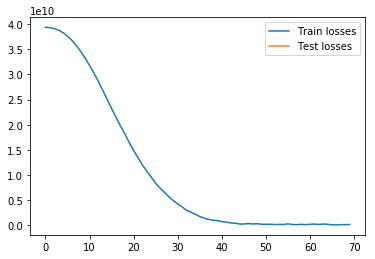

In [87]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

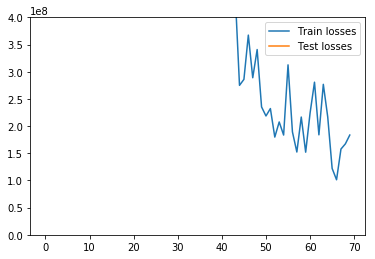

In [88]:
plt.ylim(top=4e8)
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()